<a href="https://colab.research.google.com/github/IsaiahejWashington/-CS311_FinalProject_IEJW/blob/main/Final%20Project_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Your Name**  

## Standard Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [62]:
#example - you will replace this with the models you are actually using.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

## Imports for Splitting Data and Building Pipeline


In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [93]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
red_wine = pd.read_csv(url, sep=';')
red_wine.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [94]:
red_wine.rename(columns={'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar': 'residual_sugar','free sulfur dioxide': 'free_sulfur_dioxide','total sulfur dioxide': 'total_sulfur_dioxide'}, inplace=True)
red_wine.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


I know this is not the normal way we have uploaded datasets but the way I did it every other assignment simply did not work with the wine datasets.

### Statistical and Visual Exploration

In [95]:
numerical_summary = red_wine.describe()
print(numerical_summary)

       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

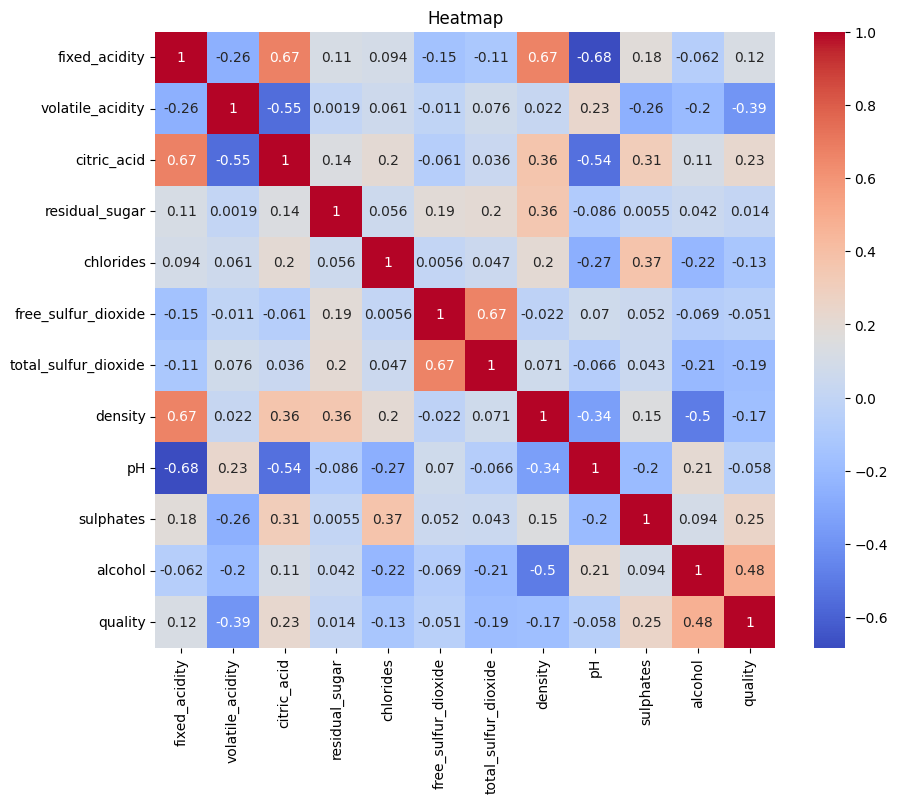

In [96]:
plt.figure(figsize=(10,8))
sns.heatmap(red_wine.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()

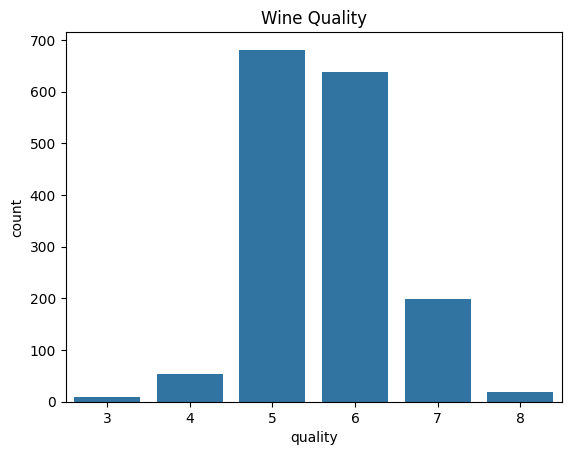

In [97]:
sns.countplot(x='quality', data=red_wine)
plt.title("Wine Quality")
plt.show()

### Splitting Data into Train/Test

In [98]:
X = red_wine.drop('quality', axis=1)
y=red_wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("X and Y tests")
print(X_test.shape, y_train.shape)
print("X and y trains")
print(X_train.shape, y_train.shape)

X and Y tests
(320, 11) (1279,)
X and y trains
(1279, 11) (1279,)


### Building the Pipeline

In [99]:
 lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

In [100]:
svm_pipeline = Pipeline ([
    ('scaler', StandardScaler()),
    ('svm', SVR())
])

svm_pipeline.fit(X_train, y_train)

param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 'auto'],
    'svm__kernel': ['rbf', 'linear']
}

grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVR())]),
             param_grid={'svm__C': [0.1, 1, 10],
                         'svm__gamma': ['scale', 'auto'],
                         'svm__kernel': ['rbf', 'linear']},
             scoring='neg_root_mean_squared_error')

In [78]:
best_svr = grid_search.best_estimator_
y_pred_svr = best_svr.predict(X_test)


rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Best model")
print(f"Best Params: {grid_search.best_params_}")
print(f"RMSE: {rmse_svr:.3f}")
print(f"MAE: {mae_svr:.3f}")
print(f"R²: {r2_svr:.3f}")

Best model
Best Params: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
RMSE: 0.593
MAE: 0.454
R²: 0.462


The support vector machine is the higher performing model

### Executing the Model

In [92]:
lr_pipeline_train = lr_pipeline.predict(X_train)
lr_pipeline_test = lr_pipeline.predict(X_test)
svm_pipeline_train = svm_pipeline.predict(X_train)
svm_pipeline_test = svm_pipeline.predict(X_test)

print("Linear Regression RMSE (train)")
print(np.sqrt(mean_squared_error(y_train, lr_pipeline_train)))
print("Linear Regression RMSE (test)")
print(np.sqrt(mean_squared_error(y_test, lr_pipeline_test)))
print("SVM RMSE (Train)")
print(np.sqrt(mean_squared_error(y_train, svm_pipeline_train)))
print("SVM RMSE (Test)")
print(np.sqrt(mean_squared_error(y_test, svm_pipeline_test)))

Linear Regression RMSE (train)
0.6512995910592837
Linear Regression RMSE (test)
0.624519930798013
SVM RMSE (Train)
0.5549844931077115
SVM RMSE (Test)
0.5927681962816934


### Conclusion
Since the testing and training sets are similar the pipeline is not overfitted. However since Linear regression has a higher score the Support Vector Machine is a better fit. The SVM outscores linear regression. This would be a good model to determine the quality of wine.

## Problem 2

### Reading the Data

In [110]:
df = pd.read_csv('/content/gdrive/MyDrive/cs405/bank-additional-full.csv', sep=';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Splitting Data into Train/Test

### Building the Pipeline

### Executing the Model

### Evaluating Model

### Conclusion
Write a general conclusion about the results of your model.